In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer


## Analisis de sentimientos

In [28]:
dataset_sentimientos = pd.read_csv('./databases/sentimientos.csv')

In [29]:
dataset_sentimientos.head()

,clase,frase
0,0,me siento un poco nostalgico hoy.
1,0,"todo parece tan gris, como si algo faltara."
2,0,"no tengo ganas de hacer nada, estoy algo decaido."
3,0,echo de menos esos tiempos felices que ya no v...
4,0,"me invade una sensacion de tristeza, sin motiv..."


In [30]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v1') 

labels = [(0, "Melancolico"), (1, "Ni fu Ni fa"), (2, "Alegre")]

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(dataset_sentimientos['frase'].to_list(), dataset_sentimientos['clase'].to_list(), test_size=0.2, shuffle=True,random_state=42)

# Obtenemos los embeddings de BERT para los conjuntos de entrenamiento y prueba
X_train_vectorized = model.encode(X_train)
X_test_vectorized = model.encode(X_test)
# Creación y entrenamiento del modelo de Regresión Logística Multinomial
modelo_LR = LogisticRegression(max_iter=100, solver='lbfgs')
modelo_LR.fit(X_train_vectorized, y_train)

# Evaluación del modelo de Regresión Logística
y_pred_LR = modelo_LR.predict(X_test_vectorized)
acc_LR = accuracy_score(y_test, y_pred_LR)
report_LR = classification_report(y_test, y_pred_LR, zero_division=1)

print("Precisión Regresión Logística:", acc_LR)
print("Reporte de clasificación Regresión Logística:\n", report_LR)


Precisión Regresión Logística: 0.9393939393939394
Reporte de clasificación Regresión Logística:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.91      0.91      0.91        11
           2       1.00      1.00      1.00        11

    accuracy                           0.94        33
   macro avg       0.94      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



In [31]:
for i in range(len(y_test)):
    if y_test[i] != y_pred_LR[i]:
        print(f"Diferencia encontrada en el índice {i}:")
        print(f"X_test: {X_test[i]}")
        print(f"y_test: {y_test[i]}")
        print(f"y_pred_LR: {y_pred_LR[i]}")
        print()  # Línea en blanco para separar las salidas

Diferencia encontrada en el índice 8:
X_test: me siento como si el dia hubiera pasado desapercibido, sin nada memorable.
y_test: 1
y_pred_LR: 0

Diferencia encontrada en el índice 12:
X_test: no encuentro consuelo en nada, todo parece sombrio.
y_test: 0
y_pred_LR: 1



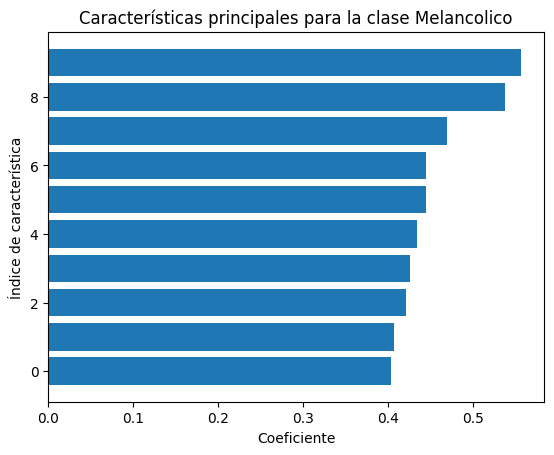

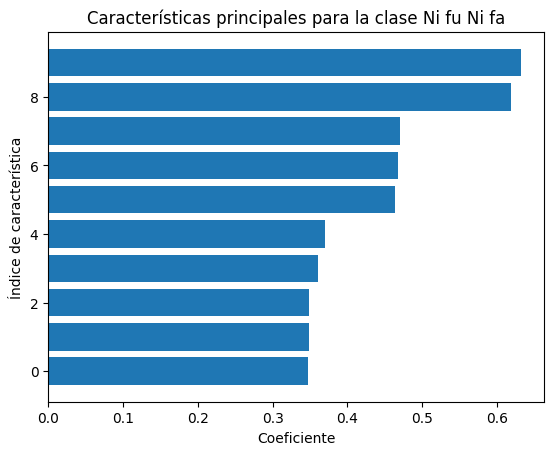

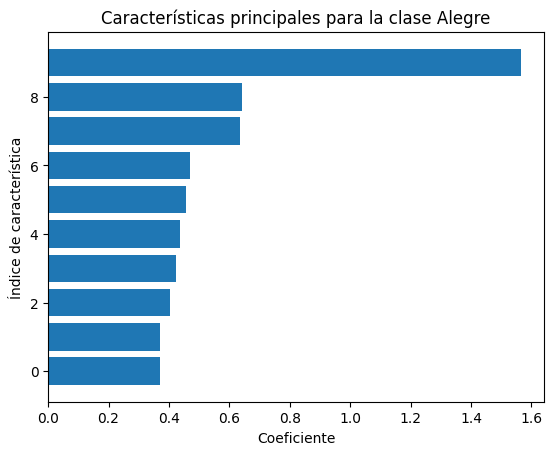

In [32]:
# Obtén los coeficientes
coef = modelo_LR.coef_

# Visualiza los coeficientes más importantes para cada clase
num_top_features = 10
for i, label in labels:
    top_features_idx = np.argsort(coef[i])[-num_top_features:]
    top_features_coef = coef[i][top_features_idx]
    
    plt.figure()
    plt.barh(range(num_top_features), top_features_coef)
    plt.title(f'Características principales para la clase {label}')
    plt.xlabel('Coeficiente')
    plt.ylabel('Índice de característica')
    plt.show()

In [33]:
# Make something to export the model to another notebook
import joblib

joblib.dump(modelo_LR, 'modelo_LR.pkl')

print("Modelo exportado correctamente")

Modelo exportado correctamente
